# Projeto Grupo BT-G3


## **Integrantes do grupo**
- Daniel Barzilai
- Larissa Carvalho
- Maria Luisa Maia
- Pedro Rezende
- Rafael Moritz
- Vitor Oliveira

<center><img src="https://www.inteli.edu.br/wp-content/uploads/2021/08/20172028/marca_1-2.png" width="50%" height="50%"/></center>

<h1 align='center'><b>IA para Marketing: Monitoramento de campanhas utilizando processamento de linguagem natural (PLN)<b></h1>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/c/c2/Btg-logo-blue.svg" width="50%" height="50%"/></center>

<h2 align='center'>O Banco BTG Pactual enfrenta um desafio na área de Marketing em entender as necessidades e demandas dos clientes de maneira fácil e rápida nas redes sociais. A solução proposta para esse problema foi o desenvolvimento de uma Inteligência Artificial utilizando processamento de linguagem natural (PLN), capaz de monitorar as campanhas de marketing, voltadas para o Instagram. O objetivo principal dessa solução é rastrear os dados em tempo real, analisar e interpretar as mensagens e comentários enviados pelos clientes na rede social, a fim de identificar as necessidades e demandas de forma precisa e eficiente.</h2>

---

# Sobre os dados

Esse projeto está utilizando dados coletados e tratados pela equipe de Automation do BTG Pactual, o qual disponibilizou o dataset. Com base nas informações dispostas nesse dataset, realizaremos insights a cerca dos comentários feitos nos posts do Instagram do próprio banco. Vale lembrar que os dados estão anonimizados e resguardados para manter a privacidade e ética com os usuários e com o banco.

# 1. Instalação / Setup

Para o início do projeto, fizemos o desenvolvimento no Google Colab, por isso temos uma célula de conexão com o Google Drive, para poder acessar os dados. Caso seja rodado no Jupyter Notebook, precisará do dataset baixado.

In [1]:
#Conectar com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

#Conectando o ambiente ao Google Drive

Mounted at /content/drive


Aqui nós fazemos as importações para tratamento dos dados, pré-processamento dos dados e modelamento do Bag of Words. 

## pips

In [2]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 30.9 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.2
    Uninstalling spacy-3.5.2:
      Successfully uninstalled spacy-3.5.2


In [3]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

from sklearn.feature_extraction.text import CountVectorizer
import ast
from keras.preprocessing.text import Tokenizer
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential 
from keras.layers import Dense, Embedding, GlobalMaxPooling1D, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from keras.utils import pad_sequences
import tensorflow as tf
from tensorflow.keras import backend as K
import seaborn as sns


import nltk
import spacy
import gensim
import pickle
from scipy.spatial.distance import cosine
from gensim.models import KeyedVectors

O desenvolvimento da rede neural seguiu o tutorial abaixo:
https://medium.com/@jvsavietto6/classificando-texto-com-redes-neurais-artificiais-150ef448b13d

# 2. Entendimento e Tratamento dos Dados

Rodando o dataset, para analisar seu conteúdo:

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Módulo 6/Sprint 3 - Projeto/nova_base_tratada (1)')
df

,Unnamed: 0,autor,sentimento,texto_tratado
0,0,winthegame_of,1,"['alvarez', 'marsal', 'estar', 'conosco', 'spo..."
1,1,marta_bego,1,"['btgpactual', 'with', 'makerepost', 'entender..."
2,2,lmviapiana,2,"['minuto', 'touro', 'ouro']"
3,3,vanilson_dos,1,['sim']
4,4,ricktolledo,2,"['querer', 'saber', 'banking', 'próprio', 'adm..."
...,...,...,...,...
9202,9472,perspectiveinvestimentos,2,"['excelente', 'explicação']"
9203,9473,eduardocolares,2,"['atendar', 'telefone', 'amor', 'deus']"
9204,9474,danielucm,2,"['saber', 'qual', 'grande', 'fiis', 'mercado',..."
9205,9475,amgcapitalinvest,1,"['erro', 'financeiro', 'eliminar', 'antes', 'a..."


In [9]:
df.columns

Index(['Unnamed: 0', 'autor', 'sentimento', 'texto_tratado'], dtype='object')

In [10]:
df = df.drop(['Unnamed: 0'], axis=1)
df

,autor,sentimento,texto_tratado
0,winthegame_of,1,"['alvarez', 'marsal', 'estar', 'conosco', 'spo..."
1,marta_bego,1,"['btgpactual', 'with', 'makerepost', 'entender..."
2,lmviapiana,2,"['minuto', 'touro', 'ouro']"
3,vanilson_dos,1,['sim']
4,ricktolledo,2,"['querer', 'saber', 'banking', 'próprio', 'adm..."
...,...,...,...
9202,perspectiveinvestimentos,2,"['excelente', 'explicação']"
9203,eduardocolares,2,"['atendar', 'telefone', 'amor', 'deus']"
9204,danielucm,2,"['saber', 'qual', 'grande', 'fiis', 'mercado',..."
9205,amgcapitalinvest,1,"['erro', 'financeiro', 'eliminar', 'antes', 'a..."


In [11]:
df['texto_tratado']

0       ['alvarez', 'marsal', 'estar', 'conosco', 'spo...
1       ['btgpactual', 'with', 'makerepost', 'entender...
2                             ['minuto', 'touro', 'ouro']
3                                                 ['sim']
4       ['querer', 'saber', 'banking', 'próprio', 'adm...
                              ...                        
9202                          ['excelente', 'explicação']
9203              ['atendar', 'telefone', 'amor', 'deus']
9204    ['saber', 'qual', 'grande', 'fiis', 'mercado',...
9205    ['erro', 'financeiro', 'eliminar', 'antes', 'a...
9206    ['porque', 'morning', 'call', 'aparecer', 'spo...
Name: texto_tratado, Length: 9207, dtype: object

In [12]:
# Supondo que seu DataFrame seja chamado de df e a coluna seja 'texto_tratado'
df['texto_tratado'] = df['texto_tratado'].str.replace("'", "")
df['texto_tratado']

0       [alvarez, marsal, estar, conosco, sportainmet,...
1       [btgpactual, with, makerepost, entender, impac...
2                                   [minuto, touro, ouro]
3                                                   [sim]
4           [querer, saber, banking, próprio, administro]
                              ...                        
9202                              [excelente, explicação]
9203                      [atendar, telefone, amor, deus]
9204    [saber, qual, grande, fiis, mercado, selecione...
9205    [erro, financeiro, eliminar, antes, ano, _, pa...
9206    [porque, morning, call, aparecer, spotify, atu...
Name: texto_tratado, Length: 9207, dtype: object

# 10. Word2Vec com CBOW

## Estruturação

In [13]:
df

,autor,sentimento,texto_tratado
0,winthegame_of,1,"[alvarez, marsal, estar, conosco, sportainmet,..."
1,marta_bego,1,"[btgpactual, with, makerepost, entender, impac..."
2,lmviapiana,2,"[minuto, touro, ouro]"
3,vanilson_dos,1,[sim]
4,ricktolledo,2,"[querer, saber, banking, próprio, administro]"
...,...,...,...
9202,perspectiveinvestimentos,2,"[excelente, explicação]"
9203,eduardocolares,2,"[atendar, telefone, amor, deus]"
9204,danielucm,2,"[saber, qual, grande, fiis, mercado, selecione..."
9205,amgcapitalinvest,1,"[erro, financeiro, eliminar, antes, ano, _, pa..."


In [14]:
cbow = '/content/drive/MyDrive/Módulo 6/Semana 5/cbow_s50/cbow_s50.txt'

In [15]:
model_cbow = KeyedVectors.load_word2vec_format(cbow)

## Teste isolado

In [16]:
# Testando o word2vec
wordvec_test = model_cbow['projeto']

wordvec_test

array([-0.074174, -0.152088,  0.086627, -0.224567,  0.362562,  0.130683,
       -0.089179, -0.086973,  0.309501,  0.004112, -0.308202,  0.351789,
       -0.477863,  0.050276,  0.213283,  0.159895, -0.285545, -0.08832 ,
       -0.015449,  0.014816, -0.613861,  0.502556,  0.021688,  0.369492,
        0.280691,  0.016868,  0.105584, -0.180754, -0.078456,  0.148032,
        0.36293 , -0.011634,  0.412191, -0.009049,  0.010404,  0.131242,
       -0.032483, -0.133067, -0.063802,  0.434015, -0.214768, -0.072132,
        0.045601, -0.368866,  0.502808,  0.048293, -0.254894,  0.142581,
       -0.075066,  0.015646], dtype=float32)

## Definição de função

In [17]:
def create_sentence_vector(model, df):
    sentence_table = []
    for sentence in df['texto_tratado']:
        word_vectors = [model[word] for word in sentence if word in model]
        if len(word_vectors) > 0:
            sentence_vector = sum(word_vectors) / len(word_vectors)
        else:
            sentence_vector = [None] * 100  # Cria uma lista de 100 elementos None
        sentence_table.append((sentence, *sentence_vector[:50]))  # Adiciona apenas os primeiros 50 elementos do vetor

    column_labels = ['Frase']
    for i in range(50):
        column_labels.append(f'Vetor{i+1}')
    df_vec = pd.DataFrame(sentence_table, columns=column_labels)

    df["sentimentoNumerico"] = df["sentimento"].replace({'NEGATIVE': -1, 'POSITIVE': 1, 'NEUTRAL': 0})

    # Definir o índice do DataFrame df_vec como o mesmo índice de df_processada['sentimentoNumerico']
    df_vec.set_index(df["sentimentoNumerico"].index, inplace=True)

    df_vec['sentimento'] = df["sentimentoNumerico"]
    df_vec = df_vec.dropna()

    return df_vec

## Teste de funções

In [18]:
df_vec = create_sentence_vector(model_cbow, df)
df_vec

,Frase,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,...,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50,sentimento
0,"[alvarez, marsal, estar, conosco, sportainmet,...",0.213634,-0.129877,0.241601,-0.075002,-0.015629,0.206194,0.072658,0.055472,0.061554,...,0.024361,-0.111328,0.157674,0.094309,-0.047458,0.157365,-0.033920,0.022211,0.182153,1
1,"[btgpactual, with, makerepost, entender, impac...",0.222697,-0.124886,0.213157,-0.059091,-0.010530,0.201566,0.071898,0.033920,0.059524,...,0.008988,-0.079109,0.159296,0.085387,-0.008607,0.158519,-0.022680,0.031107,0.189521,1
2,"[minuto, touro, ouro]",0.265227,-0.068285,0.152235,-0.044329,-0.102729,0.141353,0.092800,0.113174,0.015783,...,0.078032,-0.202677,0.155750,0.062291,0.007038,0.134573,0.014635,0.034189,0.345674,2
3,[sim],0.166258,-0.029796,0.204045,-0.297490,0.046077,0.140763,0.035251,-0.174491,0.211817,...,0.065839,-0.092451,0.308218,-0.034692,-0.032851,-0.028724,-0.068701,0.011158,0.258413,1
4,"[querer, saber, banking, próprio, administro]",0.187512,-0.183612,0.300155,-0.052422,-0.034717,0.232278,0.058778,0.084289,0.088006,...,0.097538,-0.161461,0.196748,0.088577,-0.080884,0.167507,-0.049984,-0.000942,0.187811,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,"[excelente, explicação]",0.190917,-0.133475,0.241675,-0.053180,0.067256,0.201138,0.034109,-0.078718,-0.066131,...,-0.082151,0.016113,0.154861,0.068700,-0.004302,0.079717,-0.028388,-0.017448,0.188785,2
9203,"[atendar, telefone, amor, deus]",0.188641,-0.119377,0.199339,-0.105448,0.023176,0.178837,0.069476,-0.004494,0.034710,...,0.034035,-0.126673,0.165176,0.080313,-0.024160,0.118848,-0.003502,0.087053,0.215656,2
9204,"[saber, qual, grande, fiis, mercado, selecione...",0.215474,-0.137852,0.223206,-0.072183,-0.013213,0.205186,0.063497,0.039164,0.070273,...,0.034706,-0.097793,0.177275,0.090335,-0.047405,0.154374,-0.028906,0.023713,0.179591,2
9205,"[erro, financeiro, eliminar, antes, ano, _, pa...",0.219393,-0.129317,0.239226,-0.064735,-0.025696,0.224218,0.070732,0.042386,0.040706,...,0.025414,-0.108338,0.160880,0.092846,-0.032266,0.151619,-0.023750,0.028080,0.191956,1


In [19]:
#df_vec.to_csv('Word2Vec_Cbow_modelo_treinado',encoding='utf-8', index=False, header=True)

# 11. Naive Bayes + Word2Vec com CBOW

In [20]:
label = preprocessing.LabelEncoder()

In [21]:
label.fit(df_vec['sentimento'])
df_vec['sentimento'] = label.transform(df_vec['sentimento'])

In [22]:
df_vec = df_vec.dropna()
df_vec

,Frase,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,...,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50,sentimento
0,"[alvarez, marsal, estar, conosco, sportainmet,...",0.213634,-0.129877,0.241601,-0.075002,-0.015629,0.206194,0.072658,0.055472,0.061554,...,0.024361,-0.111328,0.157674,0.094309,-0.047458,0.157365,-0.033920,0.022211,0.182153,1
1,"[btgpactual, with, makerepost, entender, impac...",0.222697,-0.124886,0.213157,-0.059091,-0.010530,0.201566,0.071898,0.033920,0.059524,...,0.008988,-0.079109,0.159296,0.085387,-0.008607,0.158519,-0.022680,0.031107,0.189521,1
2,"[minuto, touro, ouro]",0.265227,-0.068285,0.152235,-0.044329,-0.102729,0.141353,0.092800,0.113174,0.015783,...,0.078032,-0.202677,0.155750,0.062291,0.007038,0.134573,0.014635,0.034189,0.345674,2
3,[sim],0.166258,-0.029796,0.204045,-0.297490,0.046077,0.140763,0.035251,-0.174491,0.211817,...,0.065839,-0.092451,0.308218,-0.034692,-0.032851,-0.028724,-0.068701,0.011158,0.258413,1
4,"[querer, saber, banking, próprio, administro]",0.187512,-0.183612,0.300155,-0.052422,-0.034717,0.232278,0.058778,0.084289,0.088006,...,0.097538,-0.161461,0.196748,0.088577,-0.080884,0.167507,-0.049984,-0.000942,0.187811,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,"[excelente, explicação]",0.190917,-0.133475,0.241675,-0.053180,0.067256,0.201138,0.034109,-0.078718,-0.066131,...,-0.082151,0.016113,0.154861,0.068700,-0.004302,0.079717,-0.028388,-0.017448,0.188785,2
9203,"[atendar, telefone, amor, deus]",0.188641,-0.119377,0.199339,-0.105448,0.023176,0.178837,0.069476,-0.004494,0.034710,...,0.034035,-0.126673,0.165176,0.080313,-0.024160,0.118848,-0.003502,0.087053,0.215656,2
9204,"[saber, qual, grande, fiis, mercado, selecione...",0.215474,-0.137852,0.223206,-0.072183,-0.013213,0.205186,0.063497,0.039164,0.070273,...,0.034706,-0.097793,0.177275,0.090335,-0.047405,0.154374,-0.028906,0.023713,0.179591,2
9205,"[erro, financeiro, eliminar, antes, ano, _, pa...",0.219393,-0.129317,0.239226,-0.064735,-0.025696,0.224218,0.070732,0.042386,0.040706,...,0.025414,-0.108338,0.160880,0.092846,-0.032266,0.151619,-0.023750,0.028080,0.191956,1


## Separando Treino e Teste

In [23]:
target = df_vec['sentimento']

In [24]:
feature = df_vec.iloc[:,1:50]

In [25]:
feature

,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,Vetor10,...,Vetor40,Vetor41,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49
0,0.213634,-0.129877,0.241601,-0.075002,-0.015629,0.206194,0.072658,0.055472,0.061554,0.170172,...,0.074627,-0.270438,0.024361,-0.111328,0.157674,0.094309,-0.047458,0.157365,-0.033920,0.022211
1,0.222697,-0.124886,0.213157,-0.059091,-0.010530,0.201566,0.071898,0.033920,0.059524,0.164536,...,0.086584,-0.301574,0.008988,-0.079109,0.159296,0.085387,-0.008607,0.158519,-0.022680,0.031107
2,0.265227,-0.068285,0.152235,-0.044329,-0.102729,0.141353,0.092800,0.113174,0.015783,0.202198,...,-0.008447,-0.193025,0.078032,-0.202677,0.155750,0.062291,0.007038,0.134573,0.014635,0.034189
3,0.166258,-0.029796,0.204045,-0.297490,0.046077,0.140763,0.035251,-0.174491,0.211817,0.288314,...,0.183434,-0.415105,0.065839,-0.092451,0.308218,-0.034692,-0.032851,-0.028724,-0.068701,0.011158
4,0.187512,-0.183612,0.300155,-0.052422,-0.034717,0.232278,0.058778,0.084289,0.088006,0.148424,...,0.046667,-0.247744,0.097538,-0.161461,0.196748,0.088577,-0.080884,0.167507,-0.049984,-0.000942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,0.190917,-0.133475,0.241675,-0.053180,0.067256,0.201138,0.034109,-0.078718,-0.066131,0.187608,...,0.014565,-0.321192,-0.082151,0.016113,0.154861,0.068700,-0.004302,0.079717,-0.028388,-0.017448
9203,0.188641,-0.119377,0.199339,-0.105448,0.023176,0.178837,0.069476,-0.004494,0.034710,0.150081,...,0.071114,-0.194663,0.034035,-0.126673,0.165176,0.080313,-0.024160,0.118848,-0.003502,0.087053
9204,0.215474,-0.137852,0.223206,-0.072183,-0.013213,0.205186,0.063497,0.039164,0.070273,0.172185,...,0.081652,-0.300155,0.034706,-0.097793,0.177275,0.090335,-0.047405,0.154374,-0.028906,0.023713
9205,0.219393,-0.129317,0.239226,-0.064735,-0.025696,0.224218,0.070732,0.042386,0.040706,0.154811,...,0.063415,-0.258450,0.025414,-0.108338,0.160880,0.092846,-0.032266,0.151619,-0.023750,0.028080


In [26]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

## Avaliação do modelo 

In [27]:
clf = GaussianNB()

clf = clf.fit(X_train,y_train.values.ravel())

Y_pred = clf.predict(X_test)

print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.29      0.74      0.42       386
           1       0.74      0.46      0.56       844
           2       0.34      0.20      0.25       612

    accuracy                           0.43      1842
   macro avg       0.46      0.46      0.41      1842
weighted avg       0.51      0.43      0.43      1842



In [28]:
acc_score = accuracy_score(y_test, Y_pred)
format_output = "{:.2%}".format(acc_score)
print("Precisão final de :",format_output) 

Precisão final de : 42.94%


# 12. Word2Vec com embedding layer

## Definição de função

In [29]:
from gensim.models import Word2Vec

# Função que treina o modelo Word2Vec no corpus do dataframe
def train_word2vec(df, column_name):
    # Obtém as frases tokenizadas
    sentences = df[column_name].tolist()
    
    # Treina o modelo Word2Vec
    model = Word2Vec(sentences, min_count=1)
    
    return model

In [30]:
# Função que define os vetores para cada palavra do vocabulario
def get_word_vectors(model, sentence):
    vectors = []
    for word in sentence:
        if word in model.wv:
            vectors.append(model.wv[word]) # Append na lista de vetores
    if vectors:
        return np.sum(vectors, axis=0)/len(sentence) # Soma dos vetores para cada frase
    else:
        return np.zeros(model.vector_size)

# Criação do dataframe de vetores para cada frase
def create_word2vec_dataframe(df, column_name, model):
    sentences = df[column_name].tolist()
    vectors = [get_word_vectors(model, sentence) for sentence in sentences] # Itera para cada frase um vetor
    # Criação do dataframe
    df_vectors = pd.DataFrame(vectors, columns=[f"Vetor{i}" for i in range(model.vector_size)])
    df_word2vec = pd.concat([df, df_vectors], axis=1)
    return df_word2vec

## Teste de funções

In [31]:
model = train_word2vec(df, 'texto_tratado')

In [32]:
df_word2vec = create_word2vec_dataframe(df,'texto_tratado', model)
df_word2vec

,autor,sentimento,texto_tratado,sentimentoNumerico,Vetor0,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,...,Vetor90,Vetor91,Vetor92,Vetor93,Vetor94,Vetor95,Vetor96,Vetor97,Vetor98,Vetor99
0,winthegame_of,1,"[alvarez, marsal, estar, conosco, sportainmet,...",1,0.108135,-0.027515,-0.578618,-0.311223,0.342741,0.582513,...,-0.331011,0.171356,0.115854,0.407576,-0.028241,-0.249628,-0.069736,0.052952,0.322158,-0.108738
1,marta_bego,1,"[btgpactual, with, makerepost, entender, impac...",1,0.111517,0.001278,-0.552969,-0.288248,0.303032,0.582805,...,-0.310332,0.174199,0.099849,0.379870,-0.034922,-0.238013,-0.091016,0.070340,0.321247,-0.079625
2,lmviapiana,2,"[minuto, touro, ouro]",2,-0.055194,0.083907,-0.614759,-0.327277,0.337467,0.614014,...,-0.366691,0.330312,0.197640,0.398107,0.051024,-0.268653,0.009458,0.124287,0.401329,-0.075046
3,vanilson_dos,1,[sim],1,0.346554,0.100439,-0.466173,0.043146,0.428946,0.523282,...,-0.289289,0.026381,0.406109,0.390878,0.061961,-0.334896,-0.101127,0.189571,0.335559,-0.141967
4,ricktolledo,2,"[querer, saber, banking, próprio, administro]",2,0.046847,-0.010748,-0.590074,-0.260886,0.367818,0.548250,...,-0.355716,0.161371,0.110116,0.369940,-0.011467,-0.228353,-0.078955,0.014221,0.312695,-0.017164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,perspectiveinvestimentos,2,"[excelente, explicação]",2,0.206777,-0.020575,-0.546014,-0.393732,0.176287,0.581065,...,-0.263816,0.147015,0.051944,0.460383,-0.122683,-0.294831,-0.124148,-0.062046,0.367368,-0.002227
9203,eduardocolares,2,"[atendar, telefone, amor, deus]",2,0.144401,0.017314,-0.603351,-0.358521,0.407179,0.616990,...,-0.403889,0.213475,0.126607,0.399203,-0.023190,-0.247552,-0.013290,0.064286,0.328812,-0.115048
9204,danielucm,2,"[saber, qual, grande, fiis, mercado, selecione...",2,0.089300,-0.053939,-0.570320,-0.366888,0.324487,0.588473,...,-0.287883,0.167735,0.107425,0.404131,-0.069292,-0.231209,-0.054285,0.022797,0.360763,-0.075168
9205,amgcapitalinvest,1,"[erro, financeiro, eliminar, antes, ano, _, pa...",1,0.098567,-0.042418,-0.610832,-0.344497,0.347288,0.611232,...,-0.323466,0.199106,0.087568,0.430179,-0.046208,-0.250215,-0.102156,0.031142,0.348474,-0.088865


In [33]:
df_word2vec = df_word2vec.drop(columns=['autor', 'sentimento'])
df_word2vec

,texto_tratado,sentimentoNumerico,Vetor0,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,...,Vetor90,Vetor91,Vetor92,Vetor93,Vetor94,Vetor95,Vetor96,Vetor97,Vetor98,Vetor99
0,"[alvarez, marsal, estar, conosco, sportainmet,...",1,0.108135,-0.027515,-0.578618,-0.311223,0.342741,0.582513,-0.156178,-0.078588,...,-0.331011,0.171356,0.115854,0.407576,-0.028241,-0.249628,-0.069736,0.052952,0.322158,-0.108738
1,"[btgpactual, with, makerepost, entender, impac...",1,0.111517,0.001278,-0.552969,-0.288248,0.303032,0.582805,-0.152977,-0.093876,...,-0.310332,0.174199,0.099849,0.379870,-0.034922,-0.238013,-0.091016,0.070340,0.321247,-0.079625
2,"[minuto, touro, ouro]",2,-0.055194,0.083907,-0.614759,-0.327277,0.337467,0.614014,-0.234232,-0.012530,...,-0.366691,0.330312,0.197640,0.398107,0.051024,-0.268653,0.009458,0.124287,0.401329,-0.075046
3,[sim],1,0.346554,0.100439,-0.466173,0.043146,0.428946,0.523282,-0.110418,0.002156,...,-0.289289,0.026381,0.406109,0.390878,0.061961,-0.334896,-0.101127,0.189571,0.335559,-0.141967
4,"[querer, saber, banking, próprio, administro]",2,0.046847,-0.010748,-0.590074,-0.260886,0.367818,0.548250,-0.176722,-0.048525,...,-0.355716,0.161371,0.110116,0.369940,-0.011467,-0.228353,-0.078955,0.014221,0.312695,-0.017164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,"[excelente, explicação]",2,0.206777,-0.020575,-0.546014,-0.393732,0.176287,0.581065,-0.148453,-0.049564,...,-0.263816,0.147015,0.051944,0.460383,-0.122683,-0.294831,-0.124148,-0.062046,0.367368,-0.002227
9203,"[atendar, telefone, amor, deus]",2,0.144401,0.017314,-0.603351,-0.358521,0.407179,0.616990,-0.215791,-0.035666,...,-0.403889,0.213475,0.126607,0.399203,-0.023190,-0.247552,-0.013290,0.064286,0.328812,-0.115048
9204,"[saber, qual, grande, fiis, mercado, selecione...",2,0.089300,-0.053939,-0.570320,-0.366888,0.324487,0.588473,-0.136371,-0.078024,...,-0.287883,0.167735,0.107425,0.404131,-0.069292,-0.231209,-0.054285,0.022797,0.360763,-0.075168
9205,"[erro, financeiro, eliminar, antes, ano, _, pa...",1,0.098567,-0.042418,-0.610832,-0.344497,0.347288,0.611232,-0.160629,-0.092984,...,-0.323466,0.199106,0.087568,0.430179,-0.046208,-0.250215,-0.102156,0.031142,0.348474,-0.088865


# 13. Naive Bayes + Word2Vec com embedding layer

In [34]:
df_word2vec = df_word2vec.dropna()
df_word2vec

,texto_tratado,sentimentoNumerico,Vetor0,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,...,Vetor90,Vetor91,Vetor92,Vetor93,Vetor94,Vetor95,Vetor96,Vetor97,Vetor98,Vetor99
0,"[alvarez, marsal, estar, conosco, sportainmet,...",1,0.108135,-0.027515,-0.578618,-0.311223,0.342741,0.582513,-0.156178,-0.078588,...,-0.331011,0.171356,0.115854,0.407576,-0.028241,-0.249628,-0.069736,0.052952,0.322158,-0.108738
1,"[btgpactual, with, makerepost, entender, impac...",1,0.111517,0.001278,-0.552969,-0.288248,0.303032,0.582805,-0.152977,-0.093876,...,-0.310332,0.174199,0.099849,0.379870,-0.034922,-0.238013,-0.091016,0.070340,0.321247,-0.079625
2,"[minuto, touro, ouro]",2,-0.055194,0.083907,-0.614759,-0.327277,0.337467,0.614014,-0.234232,-0.012530,...,-0.366691,0.330312,0.197640,0.398107,0.051024,-0.268653,0.009458,0.124287,0.401329,-0.075046
3,[sim],1,0.346554,0.100439,-0.466173,0.043146,0.428946,0.523282,-0.110418,0.002156,...,-0.289289,0.026381,0.406109,0.390878,0.061961,-0.334896,-0.101127,0.189571,0.335559,-0.141967
4,"[querer, saber, banking, próprio, administro]",2,0.046847,-0.010748,-0.590074,-0.260886,0.367818,0.548250,-0.176722,-0.048525,...,-0.355716,0.161371,0.110116,0.369940,-0.011467,-0.228353,-0.078955,0.014221,0.312695,-0.017164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,"[excelente, explicação]",2,0.206777,-0.020575,-0.546014,-0.393732,0.176287,0.581065,-0.148453,-0.049564,...,-0.263816,0.147015,0.051944,0.460383,-0.122683,-0.294831,-0.124148,-0.062046,0.367368,-0.002227
9203,"[atendar, telefone, amor, deus]",2,0.144401,0.017314,-0.603351,-0.358521,0.407179,0.616990,-0.215791,-0.035666,...,-0.403889,0.213475,0.126607,0.399203,-0.023190,-0.247552,-0.013290,0.064286,0.328812,-0.115048
9204,"[saber, qual, grande, fiis, mercado, selecione...",2,0.089300,-0.053939,-0.570320,-0.366888,0.324487,0.588473,-0.136371,-0.078024,...,-0.287883,0.167735,0.107425,0.404131,-0.069292,-0.231209,-0.054285,0.022797,0.360763,-0.075168
9205,"[erro, financeiro, eliminar, antes, ano, _, pa...",1,0.098567,-0.042418,-0.610832,-0.344497,0.347288,0.611232,-0.160629,-0.092984,...,-0.323466,0.199106,0.087568,0.430179,-0.046208,-0.250215,-0.102156,0.031142,0.348474,-0.088865


## Separando Treino e Teste

In [35]:
target = df_word2vec['sentimentoNumerico']

In [36]:
feature = df_word2vec.iloc[:,2:102]

In [37]:
feature

,Vetor0,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,...,Vetor90,Vetor91,Vetor92,Vetor93,Vetor94,Vetor95,Vetor96,Vetor97,Vetor98,Vetor99
0,0.108135,-0.027515,-0.578618,-0.311223,0.342741,0.582513,-0.156178,-0.078588,0.180663,0.259550,...,-0.331011,0.171356,0.115854,0.407576,-0.028241,-0.249628,-0.069736,0.052952,0.322158,-0.108738
1,0.111517,0.001278,-0.552969,-0.288248,0.303032,0.582805,-0.152977,-0.093876,0.157012,0.274025,...,-0.310332,0.174199,0.099849,0.379870,-0.034922,-0.238013,-0.091016,0.070340,0.321247,-0.079625
2,-0.055194,0.083907,-0.614759,-0.327277,0.337467,0.614014,-0.234232,-0.012530,0.102668,0.380476,...,-0.366691,0.330312,0.197640,0.398107,0.051024,-0.268653,0.009458,0.124287,0.401329,-0.075046
3,0.346554,0.100439,-0.466173,0.043146,0.428946,0.523282,-0.110418,0.002156,-0.029682,0.382829,...,-0.289289,0.026381,0.406109,0.390878,0.061961,-0.334896,-0.101127,0.189571,0.335559,-0.141967
4,0.046847,-0.010748,-0.590074,-0.260886,0.367818,0.548250,-0.176722,-0.048525,0.113752,0.267164,...,-0.355716,0.161371,0.110116,0.369940,-0.011467,-0.228353,-0.078955,0.014221,0.312695,-0.017164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,0.206777,-0.020575,-0.546014,-0.393732,0.176287,0.581065,-0.148453,-0.049564,0.085221,0.200708,...,-0.263816,0.147015,0.051944,0.460383,-0.122683,-0.294831,-0.124148,-0.062046,0.367368,-0.002227
9203,0.144401,0.017314,-0.603351,-0.358521,0.407179,0.616990,-0.215791,-0.035666,0.215714,0.244427,...,-0.403889,0.213475,0.126607,0.399203,-0.023190,-0.247552,-0.013290,0.064286,0.328812,-0.115048
9204,0.089300,-0.053939,-0.570320,-0.366888,0.324487,0.588473,-0.136371,-0.078024,0.156528,0.250180,...,-0.287883,0.167735,0.107425,0.404131,-0.069292,-0.231209,-0.054285,0.022797,0.360763,-0.075168
9205,0.098567,-0.042418,-0.610832,-0.344497,0.347288,0.611232,-0.160629,-0.092984,0.173459,0.264204,...,-0.323466,0.199106,0.087568,0.430179,-0.046208,-0.250215,-0.102156,0.031142,0.348474,-0.088865


In [38]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

## Avaliação do modelo 

In [39]:
clf = GaussianNB()

clf = clf.fit(X_train,y_train.values.ravel())

Y_pred = clf.predict(X_test)

print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.28      0.83      0.42       386
           1       0.78      0.46      0.57       844
           2       0.35      0.11      0.17       612

    accuracy                           0.42      1842
   macro avg       0.47      0.47      0.39      1842
weighted avg       0.53      0.42      0.41      1842



In [40]:
acc_score = accuracy_score(y_test, Y_pred)
format_output = "{:.2%}".format(acc_score)
print("Precisão final de :",format_output) 

Precisão final de : 42.02%


# Rede Neural - Sequência de palavras

## Teste isolado

In [41]:
! pip install pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pad_sequences: filename=pad_sequences-0.6.1-py3-none-any.whl size=10199 sha256=0c842d09650de040385575046712761506253e3047ce8161751a698bc2b638e6
  Stored in directory: /root/.cache/pip/wheels/48/9d/22/0a6305b87a9cc46ccc032060a041c3b59f39ac462f7358997e
Successfully built pad_sequences


In [42]:
from keras.preprocessing.text import Tokenizer
#from keras_preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences

citacao = [
    "Estudo no Inteli e escolhi o curso de Sistemas de Informação",
    "Estamos fazendo um projeto para o BTG",
    "Estamos no segundo ano de graduação",
    "Somos do grupo BTG3"
]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(citacao)
citacao_token = tokenizer.texts_to_sequences(citacao)

max_length = max([len(z) for z in citacao_token]) + 1
citacao_pad = pad_sequences(citacao_token, maxlen=max_length, padding="post")

## Construção da rede neural + resultados - base tratada

A rede neural abaixo foi desenvolvida com o tutorial mencionado no ínicio do notebook, que, nesse caso o dataframe utilizado é um arquivo com a base que já passou pelo pré processamento. 

### Dataset já treinado

In [53]:
rede_neural_df = pd.read_csv("/content/drive/MyDrive/Módulo 6/Sprint 3 - Projeto/nova_base_tratada (1)")

In [54]:
rede_neural_df

,Unnamed: 0,autor,sentimento,texto_tratado
0,0,winthegame_of,1,"['alvarez', 'marsal', 'estar', 'conosco', 'spo..."
1,1,marta_bego,1,"['btgpactual', 'with', 'makerepost', 'entender..."
2,2,lmviapiana,2,"['minuto', 'touro', 'ouro']"
3,3,vanilson_dos,1,['sim']
4,4,ricktolledo,2,"['querer', 'saber', 'banking', 'próprio', 'adm..."
...,...,...,...,...
9202,9472,perspectiveinvestimentos,2,"['excelente', 'explicação']"
9203,9473,eduardocolares,2,"['atendar', 'telefone', 'amor', 'deus']"
9204,9474,danielucm,2,"['saber', 'qual', 'grande', 'fiis', 'mercado',..."
9205,9475,amgcapitalinvest,1,"['erro', 'financeiro', 'eliminar', 'antes', 'a..."


### Separação de treino e teste

In [55]:
x, y = rede_neural_df["texto_tratado"], rede_neural_df["sentimento"]

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

words = ["o", "ao", 'aos', 'os', 'a', 'as', 'e', 'um', 'uma', 
        'ele', 'ela', 'eles', 'elas', 'do', 'da', 'dos', 'das', 
        'de', 'no', 'na', 'nos', 'nas', 'pelo', 'pela', 'pelos', 
        'pelas', 'num', 'numa', 'nuns', 'numas', 'dum', 'duma', 
        'duns', 'dumas']

x_filter = []

for title in x:
  for word in words:
    title = title.replace(word, '')
  x_filter.append(title)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_filter)

vocab = len(tokenizer.word_docs) + 1

x_filter = tokenizer.texts_to_sequences(x_filter)

max_length = max([len(z) for z in x_filter])
x_filter = pad_sequences(x_filter, maxlen=max_length, padding='post')

x_train, x_test, y_train, y_test = train_test_split(x_filter, y, test_size=0.33)

print("Tamanho de x:", len(x_filter))
print("Tamanho de y:", len(y))


Tamanho de x: 9207
Tamanho de y: 9207


### Criação do modelo

In [56]:
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

model_rede_neural_df = Sequential()
model_rede_neural_df.add(Embedding(input_dim=vocab, output_dim=80, input_length=max_length, trainable=True))
model_rede_neural_df.add(GlobalMaxPooling1D())
model_rede_neural_df.add(Dropout(0.3))
model_rede_neural_df.add(Dense(units=3, activation='softmax'))

model_rede_neural_df.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[recall])

mc = ModelCheckpoint('weight.best.hdf5', monitor='val_acc', save_best_only=True, mode='max')

model_rede_neural_df.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=10, callbacks=[mc])

print(model_rede_neural_df.evaluate(x_test, y_test))


Epoch 1/10
191/193 [============================>.] - ETA: 0s - loss: 1.0023 - recall: 1.2226

193/193 [==============================] - 6s 26ms/step - loss: 1.0021 - recall: 1.2221 - val_loss: 0.9181 - val_recall: 1.1206
Epoch 2/10
191/193 [============================>.] - ETA: 0s - loss: 0.8262 - recall: 1.1923

193/193 [==============================] - 7s 35ms/step - loss: 0.8252 - recall: 1.1934 - val_loss: 0.7949 - val_recall: 1.1414
Epoch 3/10
191/193 [============================>.] - ETA: 0s - loss: 0.6936 - recall: 1.2018

193/193 [==============================] - 4s 21ms/step - loss: 0.6951 - recall: 1.2025 - val_loss: 0.7240 - val_recall: 1.1495
Epoch 4/10
193/193 [==============================] - ETA: 0s - loss: 0.5918 - recall: 1.1897

193/193 [==============================] - 5s 24ms/step - loss: 0.5918 - recall: 1.1897 - val_loss: 0.6815 - val_recall: 1.1324
Epoch 5/10
192/193 [============================>.] - ETA: 0s - loss: 0.5073 - recall: 1.1535

193/193 [==============================] - 5s 27ms/step - loss: 0.5072 - recall: 1.1530 - val_loss: 0.6581 - val_recall: 1.1011
Epoch 6/10
193/193 [==============================] - ETA: 0s - loss: 0.4384 - recall: 1.1206

193/193 [==============================] - 6s 30ms/step - loss: 0.4384 - recall: 1.1206 - val_loss: 0.6427 - val_recall: 1.1096
Epoch 7/10
192/193 [============================>.] - ETA: 0s - loss: 0.3780 - recall: 1.1048

193/193 [==============================] - 7s 35ms/step - loss: 0.3781 - recall: 1.1037 - val_loss: 0.6386 - val_recall: 1.0971
Epoch 8/10
192/193 [============================>.] - ETA: 0s - loss: 0.3305 - recall: 1.0856

193/193 [==============================] - 6s 33ms/step - loss: 0.3302 - recall: 1.0858 - val_loss: 0.6344 - val_recall: 1.1005
Epoch 9/10
192/193 [============================>.] - ETA: 0s - loss: 0.2935 - recall: 1.0814

193/193 [==============================] - 4s 21ms/step - loss: 0.2931 - recall: 1.0812 - val_loss: 0.6362 - val_recall: 1.0920
Epoch 10/10
193/193 [==============================] - ETA: 0s - loss: 0.2566 - recall: 1.0621

95/95 [==============================] - 0s 4ms/step - loss: 0.6403 - recall: 1.0947
[0.6402556896209717, 1.0946693420410156]


### Relatório de Classificação e matiz de confusão

In [57]:
y_pred_probs = model_rede_neural_df.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1) 

classification = classification_report(y_test, y_pred_classes)

print("\nRelatório de Classificação:")
print(classification)

95/95 [==============================] - 0s 4ms/step

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       662
           1       0.77      0.76      0.77      1358
           2       0.71      0.73      0.72      1019

    accuracy                           0.73      3039
   macro avg       0.72      0.72      0.72      3039
weighted avg       0.73      0.73      0.73      3039



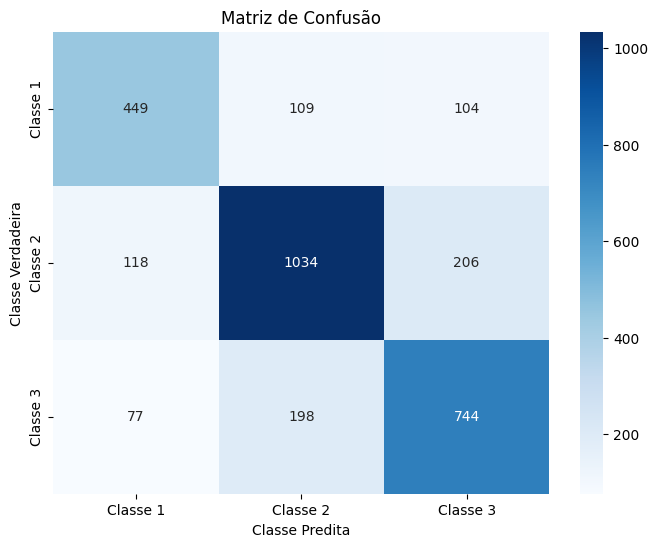

In [58]:
cm = confusion_matrix(y_test, y_pred_classes)
classes = ['Classe 1', 'Classe 2', 'Classe 3']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot
=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

### Exportação com a biblioteca pickle

In [59]:
with open('redeNeural_base_sprint3.pkl', 'wb') as arquivo:
    pickle.dump(model_rede_neural_df, arquivo)
with open('redeNeural_base_sprint3.pkl', 'rb') as arquivo:
    modelo_redeNeural_base_sprint3 = pickle.load(arquivo)

## Construção da rede neural + resultados - word2vec com cbow

A rede neural abaixo foi desenvolvida com o tutorial mencionado no ínicio do notebook, que, nesse caso o dataframe utilizado é a variável do Word2Vec com o CBoW. 

### Dataframe do word2vec com o cbow


In [60]:
df_vec

,Frase,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,...,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50,sentimento
0,"[alvarez, marsal, estar, conosco, sportainmet,...",0.213634,-0.129877,0.241601,-0.075002,-0.015629,0.206194,0.072658,0.055472,0.061554,...,0.024361,-0.111328,0.157674,0.094309,-0.047458,0.157365,-0.033920,0.022211,0.182153,1
1,"[btgpactual, with, makerepost, entender, impac...",0.222697,-0.124886,0.213157,-0.059091,-0.010530,0.201566,0.071898,0.033920,0.059524,...,0.008988,-0.079109,0.159296,0.085387,-0.008607,0.158519,-0.022680,0.031107,0.189521,1
2,"[minuto, touro, ouro]",0.265227,-0.068285,0.152235,-0.044329,-0.102729,0.141353,0.092800,0.113174,0.015783,...,0.078032,-0.202677,0.155750,0.062291,0.007038,0.134573,0.014635,0.034189,0.345674,2
3,[sim],0.166258,-0.029796,0.204045,-0.297490,0.046077,0.140763,0.035251,-0.174491,0.211817,...,0.065839,-0.092451,0.308218,-0.034692,-0.032851,-0.028724,-0.068701,0.011158,0.258413,1
4,"[querer, saber, banking, próprio, administro]",0.187512,-0.183612,0.300155,-0.052422,-0.034717,0.232278,0.058778,0.084289,0.088006,...,0.097538,-0.161461,0.196748,0.088577,-0.080884,0.167507,-0.049984,-0.000942,0.187811,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,"[excelente, explicação]",0.190917,-0.133475,0.241675,-0.053180,0.067256,0.201138,0.034109,-0.078718,-0.066131,...,-0.082151,0.016113,0.154861,0.068700,-0.004302,0.079717,-0.028388,-0.017448,0.188785,2
9203,"[atendar, telefone, amor, deus]",0.188641,-0.119377,0.199339,-0.105448,0.023176,0.178837,0.069476,-0.004494,0.034710,...,0.034035,-0.126673,0.165176,0.080313,-0.024160,0.118848,-0.003502,0.087053,0.215656,2
9204,"[saber, qual, grande, fiis, mercado, selecione...",0.215474,-0.137852,0.223206,-0.072183,-0.013213,0.205186,0.063497,0.039164,0.070273,...,0.034706,-0.097793,0.177275,0.090335,-0.047405,0.154374,-0.028906,0.023713,0.179591,2
9205,"[erro, financeiro, eliminar, antes, ano, _, pa...",0.219393,-0.129317,0.239226,-0.064735,-0.025696,0.224218,0.070732,0.042386,0.040706,...,0.025414,-0.108338,0.160880,0.092846,-0.032266,0.151619,-0.023750,0.028080,0.191956,1


### Separação treino e teste

In [61]:
x, y = df_vec["Frase"], df_vec["sentimento"]

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

words = ["o", "ao", 'aos', 'os', 'a', 'as', 'e', 'um', 'uma', 
        'ele', 'ela', 'eles', 'elas', 'do', 'da', 'dos', 'das', 
        'de', 'no', 'na', 'nos', 'nas', 'pelo', 'pela', 'pelos', 
        'pelas', 'num', 'numa', 'nuns', 'numas', 'dum', 'duma', 
        'duns', 'dumas']

x_filter = []

for title in x:
  for word in words:
    title = title.replace(word, '')
  x_filter.append(title)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_filter)

vocab = len(tokenizer.word_docs) + 1

x_filter = tokenizer.texts_to_sequences(x_filter)

max_length = max([len(z) for z in x_filter])
x_filter = pad_sequences(x_filter, maxlen=max_length, padding='post')

x_train, x_test, y_train, y_test = train_test_split(x_filter, y, test_size=0.33)

print("Tamanho de x:", len(x_filter))
print("Tamanho de y:", len(y))


Tamanho de x: 9207
Tamanho de y: 9207


### Criação do modelo

In [62]:
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

model_df_vec = Sequential()
model_df_vec.add(Embedding(input_dim=vocab, output_dim=80, input_length=max_length, trainable=True))
model_df_vec.add(GlobalMaxPooling1D())
model_df_vec.add(Dropout(0.3))
model_df_vec.add(Dense(units=3, activation='softmax'))

model_df_vec.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[recall])

mc = ModelCheckpoint('weight.best.hdf5', monitor='val_acc', save_best_only=True, mode='max')

model_df_vec.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=10, callbacks=[mc])

print(model_df_vec.evaluate(x_test, y_test))


Epoch 1/10
191/193 [============================>.] - ETA: 0s - loss: 1.0039 - recall: 1.1904

193/193 [==============================] - 5s 21ms/step - loss: 1.0025 - recall: 1.1884 - val_loss: 0.9031 - val_recall: 1.2317
Epoch 2/10
193/193 [==============================] - ETA: 0s - loss: 0.8272 - recall: 1.2215

193/193 [==============================] - 4s 22ms/step - loss: 0.8272 - recall: 1.2215 - val_loss: 0.7758 - val_recall: 1.2099
Epoch 3/10
193/193 [==============================] - ETA: 0s - loss: 0.6989 - recall: 1.2187

193/193 [==============================] - 5s 27ms/step - loss: 0.6989 - recall: 1.2187 - val_loss: 0.7066 - val_recall: 1.2012
Epoch 4/10
192/193 [============================>.] - ETA: 0s - loss: 0.6036 - recall: 1.1947

193/193 [==============================] - 4s 21ms/step - loss: 0.6036 - recall: 1.1940 - val_loss: 0.6648 - val_recall: 1.1512
Epoch 5/10
191/193 [============================>.] - ETA: 0s - loss: 0.5130 - recall: 1.1655

193/193 [==============================] - 4s 21ms/step - loss: 0.5130 - recall: 1.1656 - val_loss: 0.6397 - val_recall: 1.1308
Epoch 6/10
192/193 [============================>.] - ETA: 0s - loss: 0.4486 - recall: 1.1320

193/193 [==============================] - 5s 26ms/step - loss: 0.4499 - recall: 1.1323 - val_loss: 0.6260 - val_recall: 1.1403
Epoch 7/10
192/193 [============================>.] - ETA: 0s - loss: 0.3972 - recall: 1.1198

193/193 [==============================] - 7s 36ms/step - loss: 0.3964 - recall: 1.1194 - val_loss: 0.6194 - val_recall: 1.1348
Epoch 8/10
193/193 [==============================] - ETA: 0s - loss: 0.3443 - recall: 1.1008

193/193 [==============================] - 6s 30ms/step - loss: 0.3443 - recall: 1.1008 - val_loss: 0.6188 - val_recall: 1.1231
Epoch 9/10
193/193 [==============================] - ETA: 0s - loss: 0.3041 - recall: 1.0893

193/193 [==============================] - 5s 27ms/step - loss: 0.3041 - recall: 1.0893 - val_loss: 0.6209 - val_recall: 1.1243
Epoch 10/10
193/193 [==============================] - ETA: 0s - loss: 0.2760 - recall: 1.0743

95/95 [==============================] - 0s 3ms/step - loss: 0.6274 - recall: 1.1126
[0.6273788213729858, 1.1126384735107422]


### Relatório de Classificação e matiz de confusão

In [63]:
y_pred_probs = model_df_vec.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1) 

classification = classification_report(y_test, y_pred_classes)

print("\nRelatório de Classificação:")
print(classification)

95/95 [==============================] - 0s 2ms/step

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       633
           1       0.79      0.74      0.77      1308
           2       0.71      0.77      0.74      1098

    accuracy                           0.74      3039
   macro avg       0.73      0.74      0.73      3039
weighted avg       0.74      0.74      0.74      3039



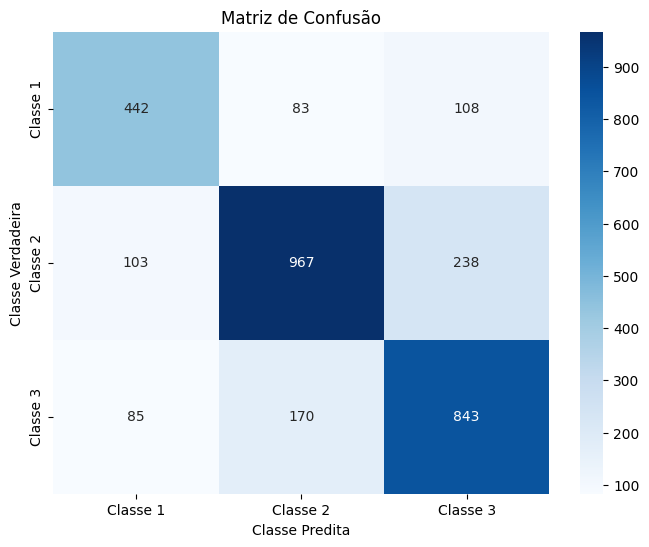

In [64]:
cm = confusion_matrix(y_test, y_pred_classes)
classes = ['Classe 1', 'Classe 2', 'Classe 3']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot
=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

### Exportação com a biblioteca pickle

In [65]:
with open('redeNeural_word2vec_cbow_sprint3.pkl', 'wb') as arquivo:
    pickle.dump(model_df_vec, arquivo)
with open('redeNeural_word2vec_cbow_sprint3.pkl', 'rb') as arquivo:
    redeNeural_word2vec_cbow_sprint3 = pickle.load(arquivo)

## Construção da rede neural + resultados - word2vec com embedding layer

A rede neural abaixo foi desenvolvida com o tutorial mencionado no ínicio do notebook, que, nesse caso o dataframe utilizado é a variável do Word2Vec com Embedding Layer.

### Dataframe do word2vec com embedding layer

In [66]:
df_word2vec

,texto_tratado,sentimentoNumerico,Vetor0,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,...,Vetor90,Vetor91,Vetor92,Vetor93,Vetor94,Vetor95,Vetor96,Vetor97,Vetor98,Vetor99
0,"[alvarez, marsal, estar, conosco, sportainmet,...",1,0.108135,-0.027515,-0.578618,-0.311223,0.342741,0.582513,-0.156178,-0.078588,...,-0.331011,0.171356,0.115854,0.407576,-0.028241,-0.249628,-0.069736,0.052952,0.322158,-0.108738
1,"[btgpactual, with, makerepost, entender, impac...",1,0.111517,0.001278,-0.552969,-0.288248,0.303032,0.582805,-0.152977,-0.093876,...,-0.310332,0.174199,0.099849,0.379870,-0.034922,-0.238013,-0.091016,0.070340,0.321247,-0.079625
2,"[minuto, touro, ouro]",2,-0.055194,0.083907,-0.614759,-0.327277,0.337467,0.614014,-0.234232,-0.012530,...,-0.366691,0.330312,0.197640,0.398107,0.051024,-0.268653,0.009458,0.124287,0.401329,-0.075046
3,[sim],1,0.346554,0.100439,-0.466173,0.043146,0.428946,0.523282,-0.110418,0.002156,...,-0.289289,0.026381,0.406109,0.390878,0.061961,-0.334896,-0.101127,0.189571,0.335559,-0.141967
4,"[querer, saber, banking, próprio, administro]",2,0.046847,-0.010748,-0.590074,-0.260886,0.367818,0.548250,-0.176722,-0.048525,...,-0.355716,0.161371,0.110116,0.369940,-0.011467,-0.228353,-0.078955,0.014221,0.312695,-0.017164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,"[excelente, explicação]",2,0.206777,-0.020575,-0.546014,-0.393732,0.176287,0.581065,-0.148453,-0.049564,...,-0.263816,0.147015,0.051944,0.460383,-0.122683,-0.294831,-0.124148,-0.062046,0.367368,-0.002227
9203,"[atendar, telefone, amor, deus]",2,0.144401,0.017314,-0.603351,-0.358521,0.407179,0.616990,-0.215791,-0.035666,...,-0.403889,0.213475,0.126607,0.399203,-0.023190,-0.247552,-0.013290,0.064286,0.328812,-0.115048
9204,"[saber, qual, grande, fiis, mercado, selecione...",2,0.089300,-0.053939,-0.570320,-0.366888,0.324487,0.588473,-0.136371,-0.078024,...,-0.287883,0.167735,0.107425,0.404131,-0.069292,-0.231209,-0.054285,0.022797,0.360763,-0.075168
9205,"[erro, financeiro, eliminar, antes, ano, _, pa...",1,0.098567,-0.042418,-0.610832,-0.344497,0.347288,0.611232,-0.160629,-0.092984,...,-0.323466,0.199106,0.087568,0.430179,-0.046208,-0.250215,-0.102156,0.031142,0.348474,-0.088865


### Separação treino e teste


In [67]:
x, y = df_word2vec["texto_tratado"], df_word2vec["sentimentoNumerico"]

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

words = ["o", "ao", 'aos', 'os', 'a', 'as', 'e', 'um', 'uma', 
        'ele', 'ela', 'eles', 'elas', 'do', 'da', 'dos', 'das', 
        'de', 'no', 'na', 'nos', 'nas', 'pelo', 'pela', 'pelos', 
        'pelas', 'num', 'numa', 'nuns', 'numas', 'dum', 'duma', 
        'duns', 'dumas']

x_filter = []

for title in x:
  for word in words:
    title = title.replace(word, '')
  x_filter.append(title)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_filter)

vocab = len(tokenizer.word_docs) + 1

x_filter = tokenizer.texts_to_sequences(x_filter)

max_length = max([len(z) for z in x_filter])
x_filter = pad_sequences(x_filter, maxlen=max_length, padding='post')

x_train, x_test, y_train, y_test = train_test_split(x_filter, y, test_size=0.33)

print("Tamanho de x:", len(x_filter))
print("Tamanho de y:", len(y))


Tamanho de x: 9207
Tamanho de y: 9207


### Criação do modelo

In [68]:
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

model_df_word2vec = Sequential()
model_df_word2vec.add(Embedding(input_dim=vocab, output_dim=80, input_length=max_length, trainable=True))
model_df_word2vec.add(GlobalMaxPooling1D())
model_df_word2vec.add(Dropout(0.3))
model_df_word2vec.add(Dense(units=3, activation='softmax'))

model_df_word2vec.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[recall])

mc = ModelCheckpoint('weight.best.hdf5', monitor='val_acc', save_best_only=True, mode='max')

model_df_word2vec.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=10, callbacks=[mc])

print(model_df_word2vec.evaluate(x_test, y_test))


Epoch 1/10
193/193 [==============================] - ETA: 0s - loss: 1.0041 - recall: 1.1734

193/193 [==============================] - 6s 27ms/step - loss: 1.0041 - recall: 1.1734 - val_loss: 0.9027 - val_recall: 1.2180
Epoch 2/10
192/193 [============================>.] - ETA: 0s - loss: 0.8267 - recall: 1.1979

193/193 [==============================] - 5s 25ms/step - loss: 0.8270 - recall: 1.1991 - val_loss: 0.7699 - val_recall: 1.2051
Epoch 3/10
192/193 [============================>.] - ETA: 0s - loss: 0.6951 - recall: 1.2010

193/193 [==============================] - 4s 22ms/step - loss: 0.6948 - recall: 1.2015 - val_loss: 0.7041 - val_recall: 1.1957
Epoch 4/10
192/193 [============================>.] - ETA: 0s - loss: 0.5995 - recall: 1.1972

193/193 [==============================] - 4s 23ms/step - loss: 0.5997 - recall: 1.1962 - val_loss: 0.6654 - val_recall: 1.1787
Epoch 5/10
191/193 [============================>.] - ETA: 0s - loss: 0.5138 - recall: 1.1630

193/193 [==============================] - 5s 28ms/step - loss: 0.5142 - recall: 1.1632 - val_loss: 0.6418 - val_recall: 1.1660
Epoch 6/10
193/193 [==============================] - ETA: 0s - loss: 0.4435 - recall: 1.1323

193/193 [==============================] - 4s 22ms/step - loss: 0.4435 - recall: 1.1323 - val_loss: 0.6298 - val_recall: 1.1490
Epoch 7/10
193/193 [==============================] - ETA: 0s - loss: 0.3859 - recall: 1.1150

193/193 [==============================] - 4s 21ms/step - loss: 0.3859 - recall: 1.1150 - val_loss: 0.6220 - val_recall: 1.1206
Epoch 8/10
192/193 [============================>.] - ETA: 0s - loss: 0.3431 - recall: 1.0897

193/193 [==============================] - 6s 31ms/step - loss: 0.3430 - recall: 1.0902 - val_loss: 0.6213 - val_recall: 1.1173
Epoch 9/10
190/193 [============================>.] - ETA: 0s - loss: 0.3000 - recall: 1.0785

193/193 [==============================] - 5s 25ms/step - loss: 0.3009 - recall: 1.0783 - val_loss: 0.6238 - val_recall: 1.1129
Epoch 10/10
192/193 [============================>.] - ETA: 0s - loss: 0.2681 - recall: 1.0712

95/95 [==============================] - 0s 2ms/step - loss: 0.6277 - recall: 1.1118
[0.6277082562446594, 1.111788272857666]


### Relatório de Classificação e matiz de confusão

In [69]:
y_pred_probs = model_df_word2vec.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1) 

classification = classification_report(y_test, y_pred_classes)

print("\nRelatório de Classificação:")
print(classification)

95/95 [==============================] - 0s 2ms/step

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       632
           1       0.76      0.75      0.76      1321
           2       0.72      0.72      0.72      1086

    accuracy                           0.73      3039
   macro avg       0.72      0.72      0.72      3039
weighted avg       0.73      0.73      0.73      3039



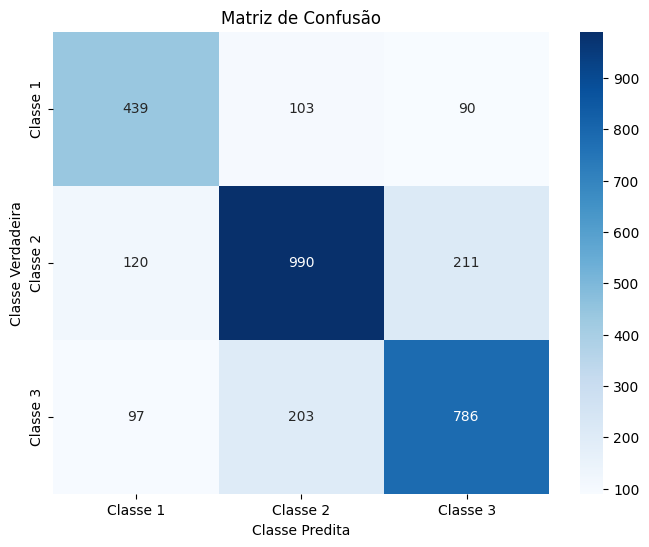

In [70]:
cm = confusion_matrix(y_test, y_pred_classes)
classes = ['Classe 1', 'Classe 2', 'Classe 3']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot
=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

### Exportação com a biblioteca pickle 

In [72]:
with open('redeNeural_word2vec_embedding_sprint3.pkl', 'wb') as arquivo:
    pickle.dump(model_df_word2vec, arquivo)
with open('redeNeural_word2vec_embedding_sprint3.pkl', 'rb') as arquivo:
    redeNeural_word2vec_embedding_sprint3 = pickle.load(arquivo)